# Project: Wrangle and Analyze Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data Gathering">Data Gathering</a></li>
<li><a href="#Assessing Data">Assessing Data</a></li>
<li><a href="#Cleaning Data">Cleaning Data</a></li>
<li><a href="#Analyzing and Visualizing Data">Analyzing and Visualizing Data</a></li>
</ul>



<a id='intro'></a>
## Introduction

Data wrangling is the main task for everyone who works with data because it includes the main process which ensures data is gathered, cleaned, quality, and visual. It includes 3 main processes Gathering, Assessing, and Cleaning.

In [1]:
#!pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

<a id='Data Gathering'></a>
## Data Gathering

In [3]:
# 1 #Download the WeRateDogs Twitter archive(manually) 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# 2 #Download the tweet image predictions(programmatically)
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    #reading tweet image predictions tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
# view the first 3 rows in image_predictions data
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
API_KEY = "dilwEwCiohLJqIThve3ymKEXq"
API_SECRET_KEY = "UpndxHLS8jQPnO7XnsaQs631Cvd1hYDxKMfHo2qBp4jAmEsgXA"
ACCESS_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKPaSgEAAAAA2g9YBZwF7QrAtu0F%2Bz6cHch2mjM%3DgMrTdSc0eRkGw3JDvmpcAdXORgszUtieT0NdX4bD536Iz9jW6P"
ACCESS_TOKEN_SECRET = ""

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)


In [6]:
# 3 #
data_tweet = pd.read_json('tweet-json.txt',lines=True)

data_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='Assessing Data'></a>
## Assessing Data

##### first dataset

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The dataset has 17 columns and with no null values and it has 2356 observations. 

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
876,761004547850530816,NaN,NaN,2016-08-04 01:03:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo and Ty. Bo eats paper and Ty felt l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,10,None,None,None,None,None
1956,673612854080196609,NaN,NaN,2015-12-06 21:19:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffri. He's a speckled ice pupper. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,None,None,pupper,None
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None


In [10]:
twitter_archive.duplicated().sum()

0

no duplicated values

In [11]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Sandra        1
Vinnie        1
Margo         1
Marty         1
Humphrey      1
Name: name, Length: 957, dtype: int64

In [12]:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Quality:

1-tweet_id type is int64 ,it should be string. 

2- timestamp type is object(string), it should be datetime.

3- missing values recorded as None and NaN.

4- name has incorrect value like a,one,an O.

5- delete unnessery colums such as "in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator'.

6-remove all rows that have values non-null such as  in retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp

Tidiness:

1-There are 4 different columns doggo, floofer, pupper and puppo,it should combine in one columns.

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The dataset has 12 columns and with no null values and it has 2356 observations. 

In [14]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
1516,786963064373534720,https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg,1,golden_retriever,0.915303,True,Saluki,0.046213,True,Labrador_retriever,0.037504,True
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True


In [16]:
image_predictions.duplicated().sum()

0

In [17]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
carousel                1
robin                   1
terrapin                1
bison                   1
banana                  1
Name: p1, Length: 378, dtype: int64

In [18]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
assault_rifle           1
grey_whale              1
shoji                   1
breakwater              1
Windsor_tie             1
Name: p2, Length: 405, dtype: int64

In [19]:
image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
chime                  1
common_newt            1
cuirass                1
jeep                   1
banana                 1
Name: p3, Length: 408, dtype: int64

Quality:

1-tweet_id type is int64 ,it should be string.


2-columns p1, p2, and p3 have some lowercase-uppercase letters.


3-Missing values from images dataset 2075 rows instead of 2356.

##### third dataset

In [20]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

The dataset has 31 columns and with no null values and it has 2354 observations.

In [21]:
data_tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [22]:
data_tweet.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1627,2016-01-06 02:49:55+00:00,684567543613382656,684567543613382656,This is Bobby. He doesn't give a damn about pe...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684567534276853761, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3312,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
13,2017-07-25 00:10:02+00:00,889638837579907072,889638837579907072,This is Ted. He does his best. Sometimes that'...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 889638825424826374, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,27672,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
247,2017-03-24 22:08:59+00:00,845397057150107648,845397057150107648,Say hello to Mimosa. She's an emotional suppor...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 845397049587699714, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8241,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1621,2016-01-07 00:59:40+00:00,684902183876321280,684902183876321280,This is Perry. He's an Augustus Gloopster. Ver...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684902175449939968, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2053,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
523,2016-12-15 02:14:29+00:00,809220051211603969,809220051211603968,This is Kyro. He's a Stratocumulus Flop. Tongu...,False,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 809220046199328768, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,22246,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [23]:
data_tweet.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

Quality:
    
1-there are missing values in some cloumns like extended_entities,possibly_sensitive....ect .

2-id column type is int64 ,it should be string and it should rename to'tweet_id'.

3-delete unnecessary colum such as (created_at,full_text,Truncated,display_text_range,entities,extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,In_reply_to_screen_name,user,geo,coordinates,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,place,contributors,'is_quote_status.I only need id,retweet_count,favorite_count.

Tidiness:
Merge twitter_archive_copy ,image_predictions_copy and tweet_data.copy to merge_df dataframe

<a id='Cleaning Data'></a>
## Cleaning Data

##### first dataset

In [24]:
#Copy Dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()
tweet_data_clean = data_tweet.copy()

### 1- Define

tweet_id type is int64 ,it should be string

### 2- Code

In [25]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

### 3- Test

In [26]:
print (twitter_archive_clean['tweet_id'].dtypes)

object


### 1- Define

timestamp type is object(string), it should be datetime.

### 2- Code

In [27]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean['timestamp'])

### 3- Test

In [28]:
print (twitter_archive_clean['timestamp'].dtypes)

datetime64[ns, UTC]


### 1- Define

name has incorrect value like a,one,an ..

### 2- Code

In [29]:
non_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

In [30]:
# raple all non _name with "None".
for name in twitter_archive_clean.name:
    if name in non_names:
        twitter_archive_clean.name[twitter_archive_clean.name == name] = 'None'

<ipython-input-30-66cece51f138>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.name[twitter_archive_clean.name == name] = 'None'


### 3- Test

In [31]:
twitter_archive_clean.name.value_counts()

None        850
Charlie      12
Oliver       11
Lucy         11
Cooper       11
           ... 
Lassie        1
Adele         1
Cal           1
Orion         1
Humphrey      1
Name: name, Length: 935, dtype: int64

In [32]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

### 1- Define

remove all rows that have values non-null such as  in retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp


### 2- Code

In [33]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

### 3- Test

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### 1- Define

delete unnessery colums such as "in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator'.



### 2- Code

In [35]:
drop_column = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
twitter_archive_clean.drop(drop_column, axis=1,inplace = True)

### 3- Test

In [36]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo
1729,679862121895714818,2015-12-24 03:12:15+00:00,"""Dammit hooman I'm jus trynna lik the fler"" 11...",None,None,None,None,None
1982,672968025906282496,2015-12-05 02:37:35+00:00,This is Gustaf. He's a purebred Chevy Equinox....,Gustaf,None,None,None,None
619,796149749086875649,2016-11-09 00:37:46+00:00,This is Ruby. She just turned on the news. Off...,Ruby,None,None,None,None
400,824775126675836928,2017-01-27 00:24:48+00:00,This is Scooter. His lack of opposable thumbs ...,Scooter,None,None,None,None
1241,712065007010385924,2016-03-21 23:55:01+00:00,This is Chester. He's clearly in charge of the...,Chester,None,None,None,None


### 1- Define

There are 4 different columns doggo, floofer, pupper and puppo,it should combine in one columns'dog_stage'

### 2- Code

In [37]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [38]:
twitter_archive_clean= twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### 3- Test

In [39]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,name,dog_stage
1136,728387165835677696,2016-05-06 00:53:27+00:00,"This is Enchilada (yes, that's her real name)....",Enchilada,NaN
947,752519690950500352,2016-07-11 15:07:30+00:00,Hopefully this puppo on a swing will help get ...,None,puppo
1654,683449695444799489,2016-01-03 00:47:59+00:00,I just want to be friends with this dog. Appea...,None,NaN


##### second dataset

### 1- Define

tweet_id type is int64 ,it should be string.

### 2- Code

In [40]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

### 3- Test

In [41]:
print(image_predictions_clean['tweet_id'].dtype)

object


### 1- Define

columns p1, p2, and p3 have some lowercase-uppercase letters,I will change to lower.

### 2- Code

In [42]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

### 3- Test

In [43]:
image_predictions_clean['p1'].value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
bison                   1
radio_telescope         1
lorikeet                1
microphone              1
banana                  1
Name: p1, Length: 378, dtype: int64

In [44]:
image_predictions_clean['p2'].value_counts()

labrador_retriever     104
golden_retriever        92
cardigan                74
chihuahua               44
pomeranian              42
                      ... 
water_bottle             1
grey_whale               1
shoji                    1
hamper                   1
african_hunting_dog      1
Name: p2, Length: 404, dtype: int64

In [45]:
image_predictions_clean['p3'].value_counts()

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
                      ..
boathouse              1
parallel_bars          1
screw                  1
gar                    1
banana                 1
Name: p3, Length: 408, dtype: int64

### 1- Define

extract dog_breed of dog from columns p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog.

### 2- Code

In [46]:
def extr_dog(r):
        is_bread = False
        conf_br = 0
        nama_br = ''
        if(r.p1_dog == True):
            if(r.p1_conf >= True):
                conf_br = r.p1_conf
                name_br = r.p1
                is_bread = True
        if(r.p2_dog == True):
            if(r.p2_conf >= conf_br):
                conf_br = r.p2_conf
                name_br =r.p2
                is_bread = True
        if(r.p3_dog == True):
            if(r.p3_conf >= conf_br):
                conf_br = r.p3_conf
                name_br =r.p3
                is_bread = True
        if is_bread == False:
            return np.nan
        else:
            return name_br
image_predictions_clean['dog_breed'] = image_predictions_clean.apply(extr_dog,axis=1)


In [47]:
drop_columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
image_predictions_clean.drop(drop_columns, axis=1,inplace = True)

### 3- Test

In [48]:
image_predictions_clean.sample(3)

,tweet_id,jpg_url,img_num,dog_breed
84,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,golden_retriever
177,669214165781868544,https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg,1,NaN
360,672640509974827008,https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg,1,cardigan


##### third dataset

### 1- Define

id column type is int64 ,it should be string and it should rename to'tweet_id'.


### 2- Code

In [49]:
tweet_data_clean['id_str'] = tweet_data_clean['id_str'].astype(str)
tweet_data_clean.rename(columns={'id_str':'tweet_id'},inplace=True)

### 3- Test

In [50]:
print(tweet_data_clean['tweet_id'].dtype)

object


In [51]:
tweet_data_clean.sample(2)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2172,2015-11-24 18:11:04+00:00,669216679721873412,669216679721873408,This is Clarq. He's a golden Quetzalcoatl. Cla...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669216674986479616, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,958,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1379,2016-02-20 03:51:05+00:00,700890391244103680,700890391244103680,This is Chet. He's dapper af. His owners want ...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 700890380988981249, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2437,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### 1- Define

delete unnecessary columns such as created_at, full_text, Truncated.....etc 

### 2- Code

In [52]:
tweet_data_clean.drop(columns=['created_at','full_text','truncated','display_text_range','entities'
    ,'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
     ,'in_reply_to_screen_name','user','geo','coordinates','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'
    ,'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],inplace=True)

### 3- Test

In [53]:
tweet_data_clean.sample(3)

,id,tweet_id,source,retweet_count,favorite_count
714,783839966405230592,783839966405230592,"<a href=""http://twitter.com/download/iphone"" r...",12643,33689
1521,690607260360429569,690607260360429568,"<a href=""http://twitter.com/download/iphone"" r...",19,313
987,748932637671223296,748932637671223296,"<a href=""http://twitter.com/download/iphone"" r...",2564,6461


### Storing

Merge twitter_archive_clean ,image_predictions_clean and tweet_data_clean to merge_df dataframe.

In [54]:
merge_df = pd.merge(twitter_archive_clean,image_predictions_clean, on='tweet_id' , how ='left')
merge_df = pd.merge(merge_df,tweet_data_clean,on='tweet_id',how='left')

In [55]:
merge_df.sample(2)

,tweet_id,timestamp,text,name,dog_stage,jpg_url,img_num,dog_breed,id,source,retweet_count,favorite_count
627,776088319444877312,2016-09-14 16:00:49+00:00,I can't tap the screen to make the hearts appe...,None,NaN,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3.0,pug,7.760883e+17,"<a href=""http://twitter.com/download/iphone"" r...",179.0,2045.0
1927,670468609693655041,2015-11-28 05:05:47+00:00,This is Edd. He's a Czechoslovakian Googolplex...,Edd,NaN,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1.0,NaN,NaN,NaN,NaN,NaN


In [56]:
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2175 non-null   object             
 1   timestamp       2175 non-null   datetime64[ns, UTC]
 2   text            2175 non-null   object             
 3   name            2175 non-null   object             
 4   dog_stage       364 non-null    object             
 5   jpg_url         1994 non-null   object             
 6   img_num         1994 non-null   float64            
 7   dog_breed       1643 non-null   object             
 8   id              1420 non-null   float64            
 9   source          1420 non-null   object             
 10  retweet_count   1420 non-null   float64            
 11  favorite_count  1420 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 220.9+ KB


In [57]:
merge_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='Analyzing and Visualizing Data'></a>
## Analyzing and Visualizing Data

In [58]:
df = pd.read_csv('twitter_archive_master.csv')

#### Visualizing the most popular dog breed

In [59]:
df.dog_breed.value_counts()

labrador_retriever      102
golden_retriever         92
cardigan                 75
chihuahua                49
pomeranian               45
                       ... 
scottish_deerhound        1
bouvier_des_flandres      1
entlebucher               1
clumber                   1
komondor                  1
Name: dog_breed, Length: 116, dtype: int64

Text(0.5, 1.0, 'Top 10 frequent dog breed')

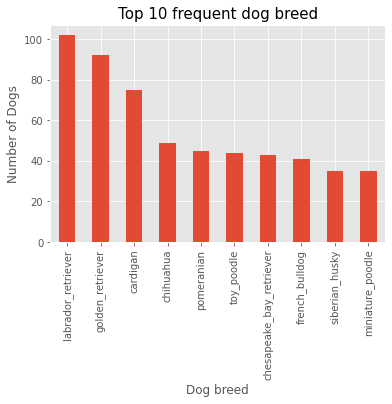

In [60]:
df['dog_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind ='bar')
plt.xlabel('Dog breed')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog breed', size=15)

The three most popular dog breed are:labrador_retriever 102 ,golden_retriever 92,cardigan 75and so on

#### Visualizing the most popular dog stage

In [61]:
df.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

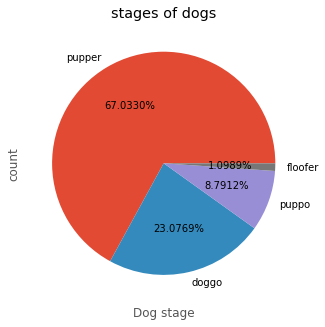

In [62]:
df.dog_stage.value_counts().plot.pie(figsize=(5,6), autopct='%.4f%%')
plt.xlabel('Dog stage')
plt.ylabel('count')
plt.title('stages of dogs')
plt.show()

the most common dog is Pupper.

#### Visualizing the total number of tweets  per month

In [63]:
data= df['tweet_id'].groupby([merge_df['timestamp'].dt.month, merge_df['timestamp'].dt.year]).count()
data.head()

timestamp  timestamp
1          2016         194
           2017          71
2          2016         125
           2017          72
3          2016         136
Name: tweet_id, dtype: int64

Text(0, 0.5, 'Tweets Count')

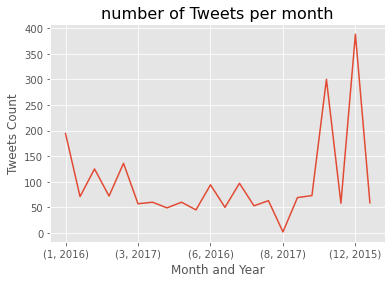

In [64]:
data.plot.line()
plt.title('number of Tweets per month', size=16)
plt.xlabel('Month and Year')
plt.ylabel('Tweets Count')

The most increase in the number of tweet is 12 month ,2015 year and the most decrease in the number of tweet is 8 month ,2017 year

#### Visualizing the most popular dog names

In [65]:
df.name.value_counts()

None          780
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Lacy            1
Longfellow      1
Aldrick         1
Diogi           1
Humphrey        1
Name: name, Length: 934, dtype: int64

Text(0.5, 1.0, 'Top 10 frequent dog name')

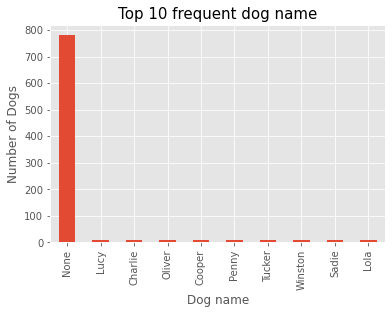

In [66]:
df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind ='bar')
plt.xlabel('Dog name')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog name', size=15)

The three most popular dog names are:Charlie 11, Lucy 11,Oliver 10 and so on